# Visualization of the results

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib import colormaps
from matplotlib.ticker import LinearLocator
import matplotlib.patches as mpatches
#from mpl_toolkits.mplot3d import axes3d
from scipy.interpolate import griddata
import networkx as nx

# for creating a responsive plot 
#%matplotlib widget 
import mpld3

In [5]:
results = pd.read_csv("grid_search_resultsS_100_2.csv")

# Remove the row with index 115
results = results.drop(index=115)

alpha = results["alpha"].to_numpy()
beta = results["beta"].to_numpy()
gamma = results["gamma"].to_numpy()

obj = results["objective_total_cost"].to_numpy()
obj_inv = results["obj_investment"].to_numpy()
obj_V = results["obj_V_index"].to_numpy()
obj_Ploss = results["obj_Power_loss"].to_numpy()

In [34]:
alpha = results["alpha"].to_numpy()
beta = results["beta"].to_numpy()
gamma = results["gamma"].to_numpy()
factor_beta = 1e5
factor_gamma = 2 * factor_beta
hyper_param_vals = np.stack((alpha, beta/factor_beta, gamma/factor_gamma)).T
print(hyper_param_vals)


obj = results["objective_total_cost"].to_numpy()
obj_inv = results["obj_investment"].to_numpy()
obj_V = results["obj_V_index"].to_numpy()
obj_Ploss = results["obj_Power_loss"].to_numpy()

[[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 2.50000000e-02 9.75000000e-01]
 [0.00000000e+00 5.00000000e-02 9.50000000e-01]
 ...
 [9.75000000e-01 0.00000000e+00 2.50000000e-02]
 [9.75000000e-01 2.50000000e-02 2.08166817e-17]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [7]:
#construction of the grid

A, B, G = [], [], []
OBJ, OBJ_inv, OBJ_V, OBJ_Ploss = [], [], [], []

step_size = 0.025
l = int(1/step_size +1)  #the size of one side of the grid
print(f"l = {l}")
search_array = np.array(np.around(alpha/step_size, 0), dtype=int)
for i in range(l):
    lb = np.where(search_array==i)[0][0]
    ub =np.where(search_array==i)[0][-1]+1
    L = ub-lb
    idx = np.where(search_array==i)[0]
    L = len(idx)
    """
    A.append(np.concatenate([alpha[lb:ub],np.nan * np.ones(21-L)]))
    B.append(np.concatenate([beta[lb:ub],np.nan * np.ones(21-L)]))
    G.append(np.concatenate([gamma[lb:ub],np.nan * np.ones(21-L)]))

    OBJ.append(np.concatenate([obj[lb:ub],np.nan * np.ones(21-L)]))
    OBJ_inv.append(np.concatenate([obj_inv[lb:ub],np.nan * np.ones(21-L)]))
    OBJ_V.append(np.concatenate([obj_V[lb:ub],np.nan * np.ones(21-L)]))
    OBJ_Ploss.append(np.concatenate([obj_Ploss[lb:ub],np.nan * np.ones(21-L)]))
    """

    A.append(np.concatenate([alpha[idx],np.nan * np.ones(l-L)]))
    B.append(np.concatenate([beta[idx],np.nan * np.ones(l-L)]))
    G.append(np.concatenate([gamma[idx],np.nan * np.ones(l-L)]))

    OBJ.append(np.concatenate([obj[idx],np.nan * np.ones(l-L)]))
    OBJ_inv.append(np.concatenate([obj_inv[idx],np.nan * np.ones(l-L)]))
    OBJ_V.append(np.concatenate([obj_V[idx],np.nan * np.ones(l-L)]))
    OBJ_Ploss.append(np.concatenate([obj_Ploss[idx],np.nan * np.ones(l-L)]))
    

A = np.array(A)
B = np.array(B)
G = np.array(G)
OBJ = np.array(OBJ)
OBJ_inv = np.array(OBJ_inv)
OBJ_V = np.array(OBJ_V)
OBJ_Ploss = np.array(OBJ_Ploss)

l = 41


make some line plots showing the V index and Ploss for a given budget. Do I need to make an interpolation?
Also observe how are the pv located.

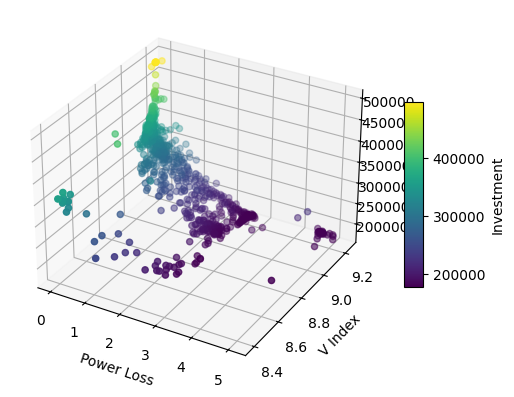

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(obj_Ploss, obj_V, obj_inv, c=obj_inv, cmap='viridis')


# Customize the axes
ax.set_xlabel("Power Loss")
ax.set_ylabel("V Index")
ax.set_zlabel("Investment")

# Add a color bar which maps values to colors
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
color_bar.set_label('Investment')

plt.show()

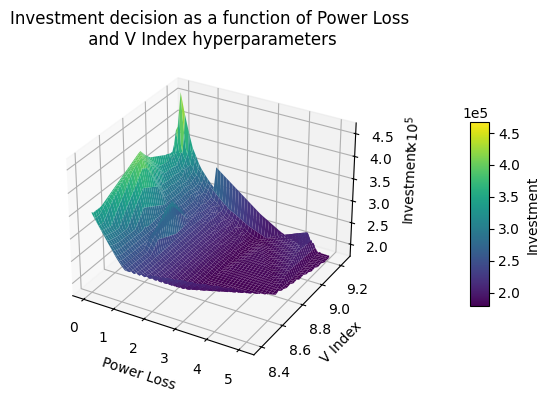

In [9]:
from matplotlib.ticker import ScalarFormatter

# Example data: replace these with your coordinates
x = obj_Ploss
y = obj_V
z = obj_inv

# Create a grid
xi = np.linspace(min(x), max(x), 100)  # X grid
yi = np.linspace(min(y), max(y), 100)  # Y grid
xi, yi = np.meshgrid(xi, yi)

# Interpolate Z values onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(xi, yi, zi, cmap='viridis')

# Add color bar and labels
color_bar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.2)
color_bar.set_label('Investment')

# Set color bar labels to scientific notation
color_bar.formatter.set_scientific(True)
color_bar.formatter.set_powerlimits((0, 0))
color_bar.update_ticks()

ax.set_xlabel("Power Loss")
ax.set_ylabel("V Index")
ax.set_zlabel("Investment")
ax.set_title("Investment decision as a function of Power Loss\n and V Index hyperparameters")

# Set z-axis labels to scientific notation
ax.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.zaxis.get_major_formatter().set_scientific(True)
ax.zaxis.get_major_formatter().set_powerlimits((0, 0))

plt.show()

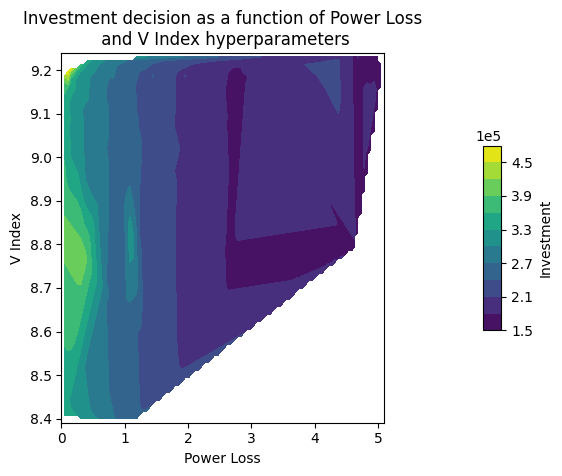

In [10]:
from matplotlib.ticker import ScalarFormatter

# Example data: replace these with your coordinates
x = obj_Ploss
y = obj_V
z = obj_inv

# Create a grid
xi = np.linspace(min(x), max(x), 100)  # X grid
yi = np.linspace(min(y), max(y), 100)  # Y grid
xi, yi = np.meshgrid(xi, yi)

# Interpolate Z values onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Surface plot
#surf = ax.plot_surface(xi, yi, zi, cmap='viridis')
# Contour plot
contour = ax.contourf(xi, yi, zi, cmap='viridis', levels=10)
#line = ax.contour(xi, yi, zi, cmap='Reds', levels=8)

# Add color bar and labels
color_bar = fig.colorbar(contour, ax=ax, shrink=0.5, aspect=10, pad=0.2)
color_bar.set_label('Investment')

# Set color bar labels to scientific notation
color_bar.formatter.set_scientific(True)
color_bar.formatter.set_powerlimits((0, 0))
color_bar.update_ticks()

ax.set_xlabel("Power Loss")
ax.set_ylabel("V Index")
#ax.set_zlabel("Investment")
ax.set_title("Investment decision as a function of Power Loss\n and V Index hyperparameters")



plt.show()

[0.70710678 0.70710678]


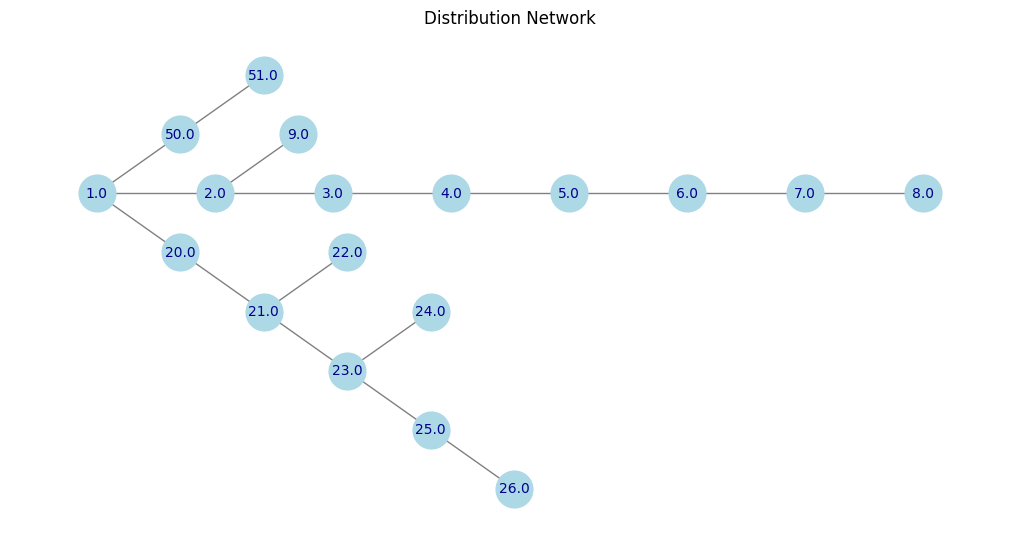

[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(50.0), np.float64(51.0)]


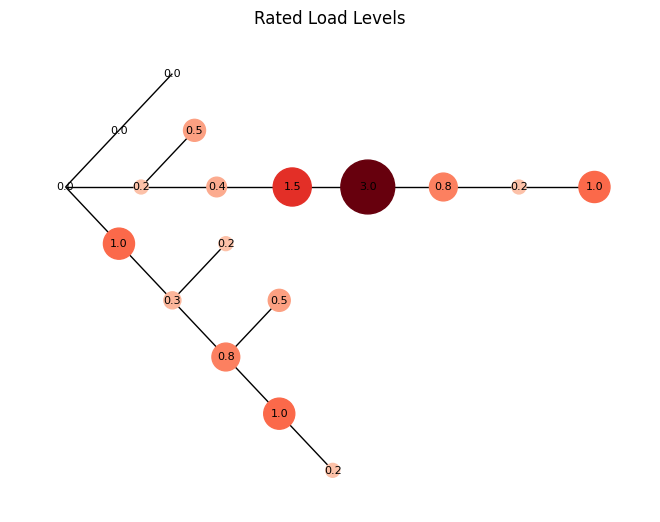

In [109]:
# Load the branch data
branch_data = pd.read_csv('DATA/branch_data.csv')
load_data = pd.read_csv('DATA/load_data.csv')
rated_p = load_data['pd']*10
load_busses = load_data['load_bus'].to_numpy()
bus_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 50, 51]
rated_p_update = np.zeros(np.size(bus_id))
count = 0
load_bus_count = 0
for i in bus_id:
    if i in load_busses:
        rated_p_update[count] = rated_p[load_bus_count]
        load_bus_count += 1
    count += 1


# Create a graph
G = nx.Graph()

seed = 10

f = 100

node_sizes = rated_p_update*500

r = rated_p_update
cmax = np.max(r)
cmin = np.min(r)
norm_rated_p = [(value - cmin) / (cmax - cmin) for value in rated_p_update+0.5]
viridis = colormaps.get_cmap('Reds')
node_colors = [viridis(value) for value in norm_rated_p]

# Add edges to the graph based on f_bus and t_bus columns
for _, row in branch_data.iterrows():
    G.add_edge(row['f_bus'], row['t_bus'])

# Draw the graph
plt.figure(figsize=(10, 5))
#pos = nx.spring_layout(G, seed=seed)  # You can replace this with a layout like circular, spectral, or others
#pos = {node: (i, 0) for i, node in enumerate(G.nodes())}  # Nodes aligned horizontally
#pos=nx.spectral_layout(G)
#pos = nx.fruchterman_reingold_layout(G)

alpha = np.pi/4
c = np.array([np.cos(alpha), np.sin(alpha)])
print(c)

pos = { 1.0: np.array([0, 0]),
        2.0: np.array([1, 0]),
        3.0: np.array([2, 0]),
        4.0: np.array([3, 0]),
        5.0: np.array([4, 0]),
        6.0: np.array([5, 0]),
        7.0: np.array([6, 0]),
        8.0: np.array([7, 0]),
        9.0: np.array([1, 0]) + 1*c,
        20.0: np.array([0, 0])+1*c*[1,-1],
        21.0: np.array([0, 0])+2*c*[1,-1],
        22.0: np.array([0, 0])+2*c*[1,-1]+c,
        23.0: np.array([0, 0])+3*c*[1,-1],
        24.0: np.array([0, 0])+3*c*[1,-1]+c,
        25.0: np.array([0, 0])+4*c*[1,-1],
        26.0: np.array([0, 0])+5*c*[1,-1],
        50.0: np.array([0, 0])+1*c,
        51.0: np.array([0, 0])+2*c,}

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=700,
    font_size=10,
    font_color="darkblue",
    edge_color="gray"
)

plt.title("Distribution Network")
plt.show()

nx.draw(
    G,
    pos,
    with_labels = False,
    node_color = node_colors,
    node_size = node_sizes
)

rated_p_list = {bus_id[i] : rated_p_update[i] for i in range(len(bus_id))}

print(G.nodes)
for node in G.nodes():
    x, y = pos[node]
    plt.text(
        x,
        y,
        str(np.around(rated_p_list[node], 2)),
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

plt.title("Rated Load Levels")
plt.show()

In [12]:
r = results.to_numpy()[:,7:]*1e-3
r[10,:]

array([2.10503145, 2.52054813, 3.64411028, 5.54490328, 9.68587297,
       7.05003956, 4.7028358 , 6.7436527 , 2.74610513, 3.21384249,
       3.08695254, 2.62745821, 4.5616423 , 3.89079663, 4.92107128,
       3.81334776, 1.27627783, 1.22367595])

In [13]:
def plot_network(j):
    investment = results.iloc[j].to_numpy()[7:]*1e-3
    bus_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 50, 51]
    investment_decision = {bus_id[i]: investment[i] for i in range(len(bus_id))}

    factor_beta = 1e5
    factor_gamma = 2*factor_beta
    
    alpha = results.iloc[j]["alpha"]
    beta = results.iloc[j]["beta"]/factor_beta
    gamma = results.iloc[j]["gamma"]/factor_gamma

    obj_inv = results.iloc[j]["obj_investment"]
    obj_V = results.iloc[j]["obj_V_index"]
    obj_Ploss = results.iloc[j]["obj_Power_loss"]

    Inv = results.to_numpy()[:,4]
    V = results.to_numpy()[:,5]
    Ploss = results.to_numpy()[:,6]

    f = 100

    # Create a graph
    G = nx.Graph()

    # Add edges to the graph based on f_bus and t_bus columns
    for _, row in branch_data.iterrows():
        G.add_edge(row['f_bus'], row['t_bus'])

    # Create a mapping for node sizes or colors based on investments
    nodes = list(G.nodes())
    node_sizes = [investment_decision[node] * f for node in nodes]  # Scale the size

    # Normalize investment values for colormap
    r = results.to_numpy()[:,7:]*1e-3
    cmax = np.max(r)
    cmin = np.min(r)

    norm_investment = [(value - cmin) / (cmax - cmin) for value in investment+0.5]
    #viridis = cm.get_cmap('Oranges', 256)  # Use the viridis colormap
    viridis = colormaps.get_cmap('Reds')
    node_colors = [viridis(value) for value in norm_investment]  # Map normalized values to colors

    #node_colors = ['green' if investment_decision[node] > 0 else 'red' for node in nodes]  # Green for investment, red otherwise

    # Draw the graph
    plt.figure(figsize=(10, 5))
    plt.title(f"Distribution Network with PV Investments (kW)\n α={alpha} | β={beta} | γ={gamma}\n obj_inv={obj_inv} | obj_V={obj_V} | obj_Ploss={obj_Ploss}", fontweight="bold")

    """
    # Add a colorbar for the viridis colormap
    sm = plt.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(investment), vmax=max(investment)))
    sm.set_array([])  # Dummy array for colorbar
    plt.colorbar(sm, ax=plt.gca(), orientation="vertical", pad=0.02, label="Investment Decision (kW)")
    """

    pos = { 1.0: np.array([0, 0]),
        2.0: np.array([1, 0]),
        3.0: np.array([2, 0]),
        4.0: np.array([3, 0]),
        5.0: np.array([4, 0]),
        6.0: np.array([5, 0]),
        7.0: np.array([6, 0]),
        8.0: np.array([7, 0]),
        9.0: np.array([1, 0]) + 1*c,
        20.0: np.array([0, 0])+1*c*[1,-1],
        21.0: np.array([0, 0])+2*c*[1,-1],
        22.0: np.array([0, 0])+2*c*[1,-1]+c,
        23.0: np.array([0, 0])+3*c*[1,-1],
        24.0: np.array([0, 0])+3*c*[1,-1]+c,
        25.0: np.array([0, 0])+4*c*[1,-1],
        26.0: np.array([0, 0])+5*c*[1,-1],
        50.0: np.array([0, 0])+1*c,
        51.0: np.array([0, 0])+2*c,}
    
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color="gray"
    )

    # Add node labels inside circles (investment sizes)
    for node in G.nodes():
        x, y = pos[node]
        plt.text(
            x,
            y,
            str(np.around(investment_decision[node], 2)),
            fontsize=8,
            ha='center',
            va='center',
            color='black'
        )



    # Add a legend for colors
    green_patch = mpatches.Patch(color='green', label='PV Installed')
    red_patch = mpatches.Patch(color='red', label='No PV Installed')
    #plt.legend(handles=[green_patch, red_patch], loc='upper left')

    # Add a legend for node sizes
    for size in [0.5, 2, 5, 10]:
        color = viridis((size-cmin) / (cmax-cmin))  # Map normalized values to colors
        plt.scatter([], [], color=color,  s=size * f, label=f"PV Size {size} kW")

    plt.legend(scatterpoints=1, borderpad=1.5,  labelspacing=1, loc='lower right', title="PV Size", title_fontproperties={'weight':'bold'})



    plt.show()
    return

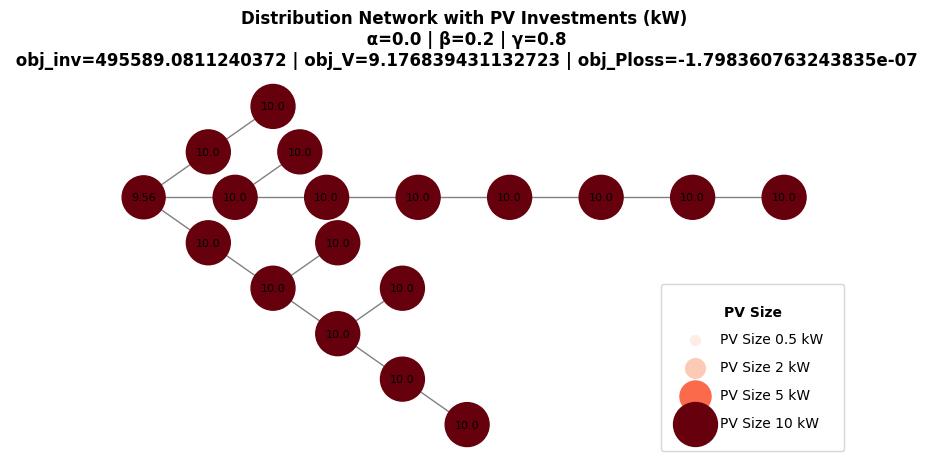

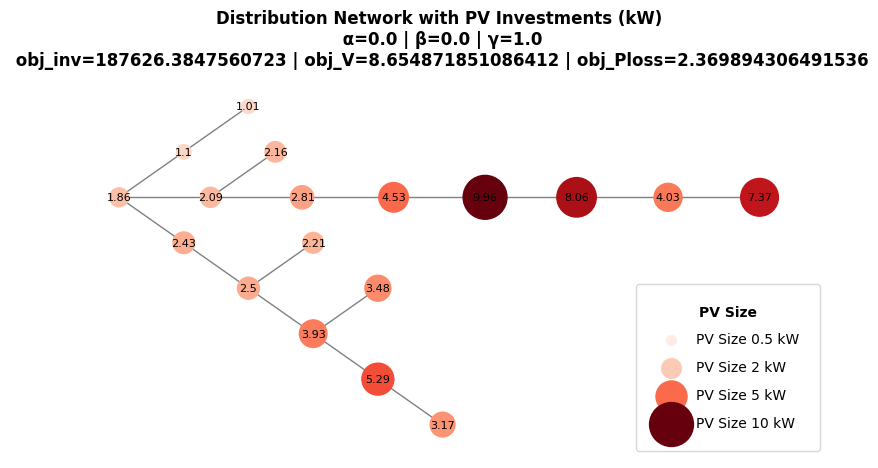

In [13]:
plot_network(8)
plot_network(0)

In [14]:
def plot_network_bars(j):
    investment = results.iloc[j].to_numpy()[7:] * 1e-3
    bus_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 50, 51]
    investment_decision = {bus_id[i]: investment[i] for i in range(len(bus_id))}

    factor_beta = 1e5
    factor_gamma = 2 * factor_beta

    alpha = results.iloc[j]["alpha"]
    beta = results.iloc[j]["beta"] / factor_beta
    gamma = results.iloc[j]["gamma"] / factor_gamma

    obj_inv = results.iloc[j]["obj_investment"]
    obj_V = results.iloc[j]["obj_V_index"]
    obj_Ploss = results.iloc[j]["obj_Power_loss"]

    Inv = results.to_numpy()[:, 4]
    V = results.to_numpy()[:, 5]
    Ploss = results.to_numpy()[:, 6]

    f = 100

    # Create a graph
    G = nx.Graph()

    # Add edges to the graph based on f_bus and t_bus columns
    for _, row in branch_data.iterrows():
        G.add_edge(row['f_bus'], row['t_bus'])

    # Create a mapping for node sizes or colors based on investments
    nodes = list(G.nodes())
    node_sizes = [investment_decision[node] * f for node in nodes]

    # Normalize investment values for colormap
    r = results.to_numpy()[:, 7:] * 1e-3
    cmax = np.max(r)
    cmin = np.min(r)

    norm_investment = [(value - cmin) / (cmax - cmin) for value in investment + 0.5]
    viridis = colormaps.get_cmap('Reds')
    node_colors = [viridis(value) for value in norm_investment]

    # Plotting the graph and the bars
    fig, ax = plt.subplots(1, 4, figsize=(15, 5), gridspec_kw={'width_ratios': [25, 1,1,1]})
    ax[0].set_title(
        f"Distribution Network with PV Investments (kW)\n α={alpha} | β={beta} | γ={gamma}",
        fontweight="bold"
    )

    # Graph visualization
    pos = { 1.0: np.array([0, 0]),
        2.0: np.array([1, 0]),
        3.0: np.array([2, 0]),
        4.0: np.array([3, 0]),
        5.0: np.array([4, 0]),
        6.0: np.array([5, 0]),
        7.0: np.array([6, 0]),
        8.0: np.array([7, 0]),
        9.0: np.array([1, 0]) + 1*c,
        20.0: np.array([0, 0])+1*c*[1,-1],
        21.0: np.array([0, 0])+2*c*[1,-1],
        22.0: np.array([0, 0])+2*c*[1,-1]+c,
        23.0: np.array([0, 0])+3*c*[1,-1],
        24.0: np.array([0, 0])+3*c*[1,-1]+c,
        25.0: np.array([0, 0])+4*c*[1,-1],
        26.0: np.array([0, 0])+5*c*[1,-1],
        50.0: np.array([0, 0])+1*c,
        51.0: np.array([0, 0])+2*c,}
    
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color="gray",
        ax=ax[0]
    )

    for node in G.nodes():
        x, y = pos[node]
        ax[0].text(
            x,
            y,
            str(np.around(investment_decision[node], 2)),
            fontsize=8,
            ha='center',
            va='center',
            color='black'
        )

    # Add bar plots for objective values
    obj_values = [obj_inv, obj_V, obj_Ploss]
    obj_names = ["Investment", "Voltage Index", "Power Loss"]
    obj_ranges = [(np.min(Inv), np.max(Inv)), (np.min(V), np.max(V)), (np.min(Ploss), np.max(Ploss))]

    for i, (obj, name, (min_val, max_val)) in enumerate(zip(obj_values, obj_names, obj_ranges)):
        ax[i+1].bar(x=0.05, height=max_val, width=0.1, color='lightgray', edgecolor='black')
        ax[i+1].scatter(0.05, obj, color='red', zorder=5)
        
        ax[i+1].set_ylim(min_val, max_val)
        ax[i+1].set_xlim(0,0.4)

        ax[i+1].set_xticks([])
        ax[i+1].set_ylabel(obj_names[i])
        ax[i+1].get_xaxis().set_visible(False)
        ax[i+1].spines['top'].set_visible(False)
        ax[i+1].spines['right'].set_visible(False)
        ax[i+1].spines['bottom'].set_visible(False)
        ax[i+1].spines['left'].set_visible(False)
        if i==0:
            # Set z-axis labels to scientific notation
            ax[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax[1].yaxis.get_major_formatter().set_scientific(True)
            ax[1].yaxis.get_major_formatter().set_powerlimits((0, 0))
            
        


    #ax[1].set_yticks(range(len(obj_names)))
    #ax[1].set_yticklabels(obj_names)
    #ax[1].set_xlabel("Objective Value")
    #ax[1].set_xlim(min(np.min(Inv), np.min(V), np.min(Ploss)) - 0.1, max(np.max(Inv), np.max(V), np.max(Ploss)) + 0.1)
    #ax[1].grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return


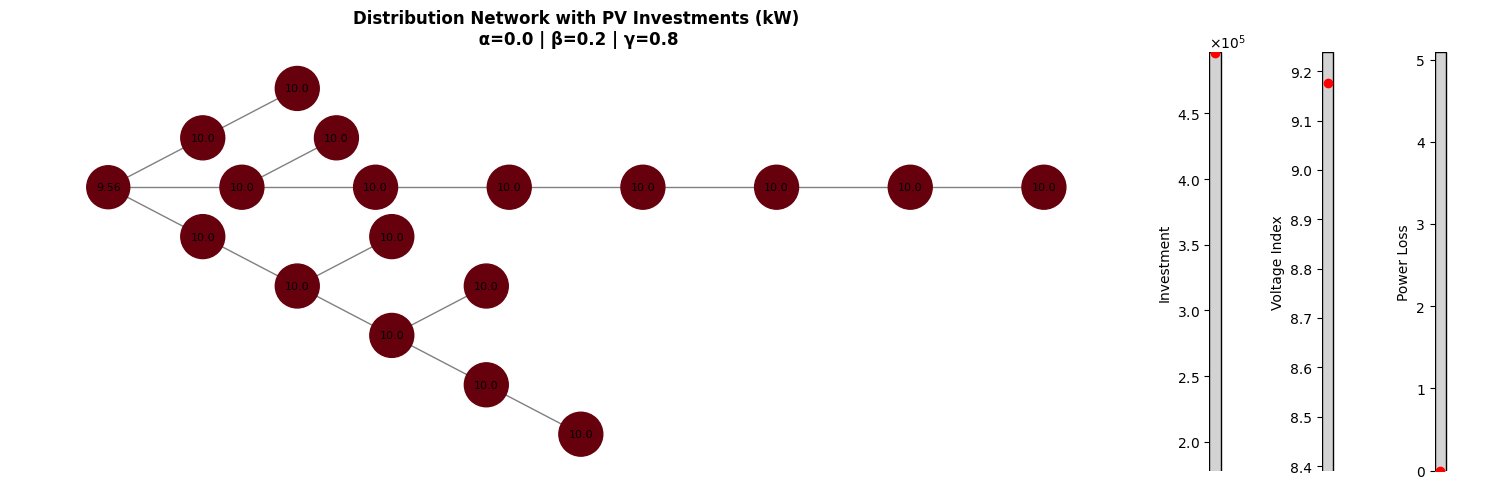

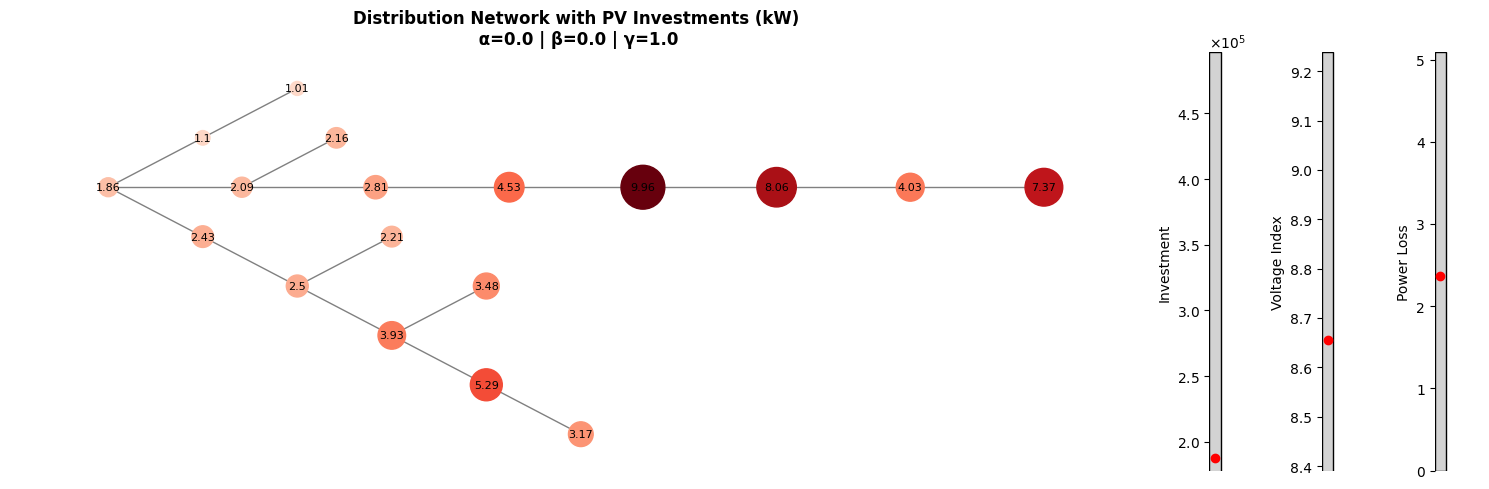

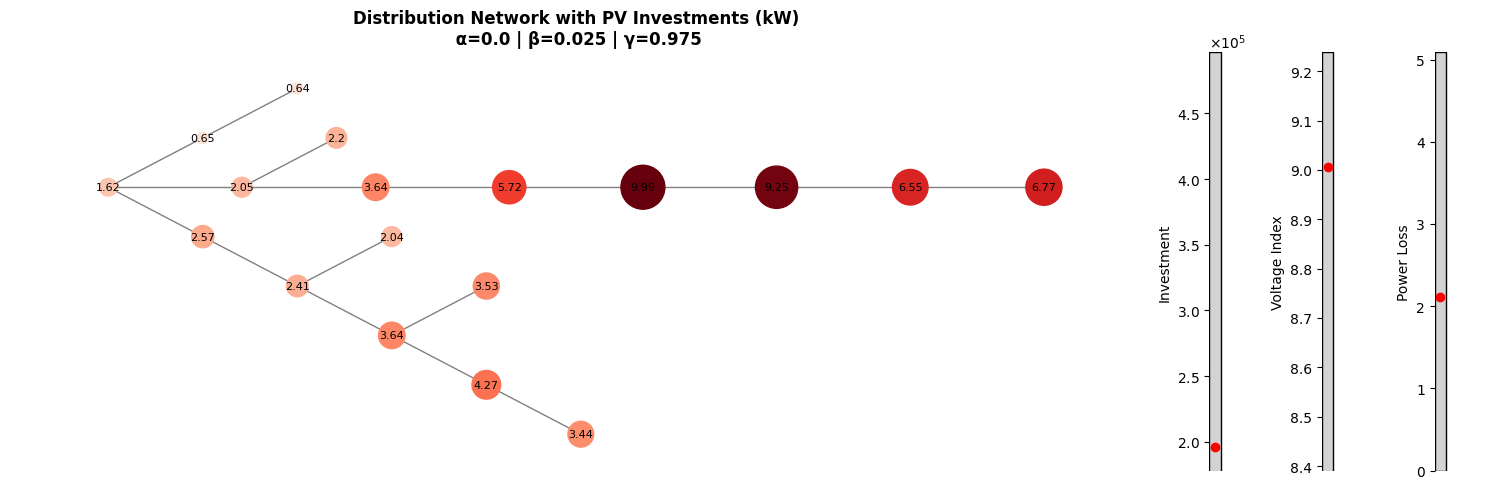

In [15]:
plot_network_bars(8)
plot_network_bars(0)
plot_network_bars(1)

In [50]:
def find_spec_plot(alpha, beta, gamma, hyper_param_vals):
    beta_val = beta
    alpha_val = alpha
    gamma_val = gamma
    target_row = [alpha_val, beta_val, gamma_val]
    indices_row = np.where(np.all(hyper_param_vals == target_row, axis =1))[0][0]

    plot_network_bars(indices_row)
    return 


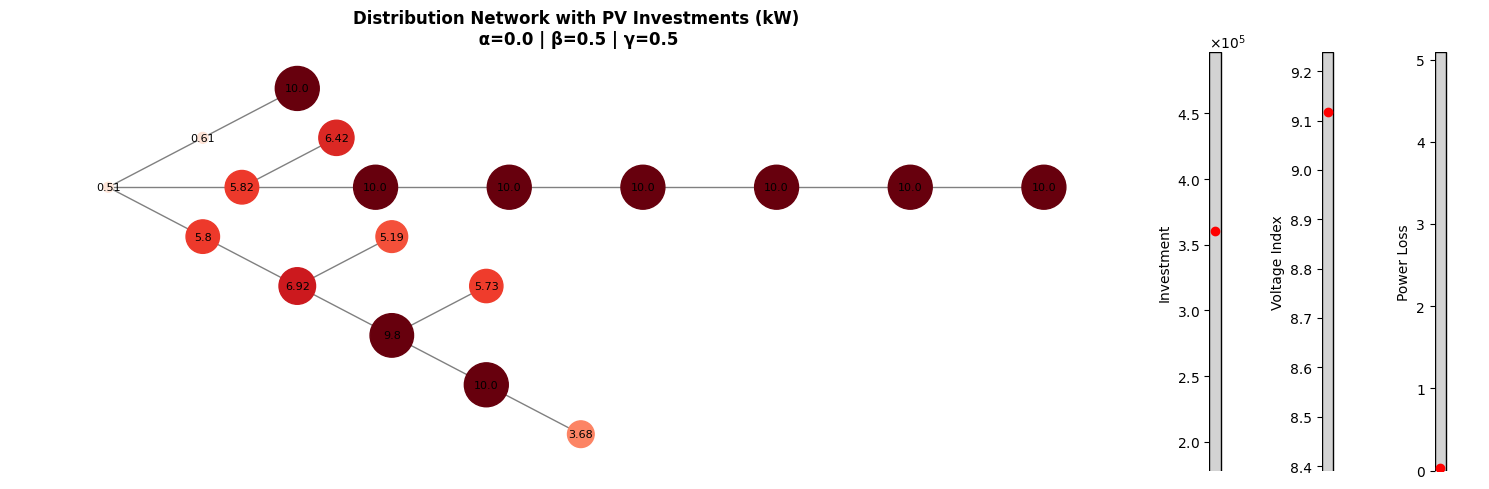

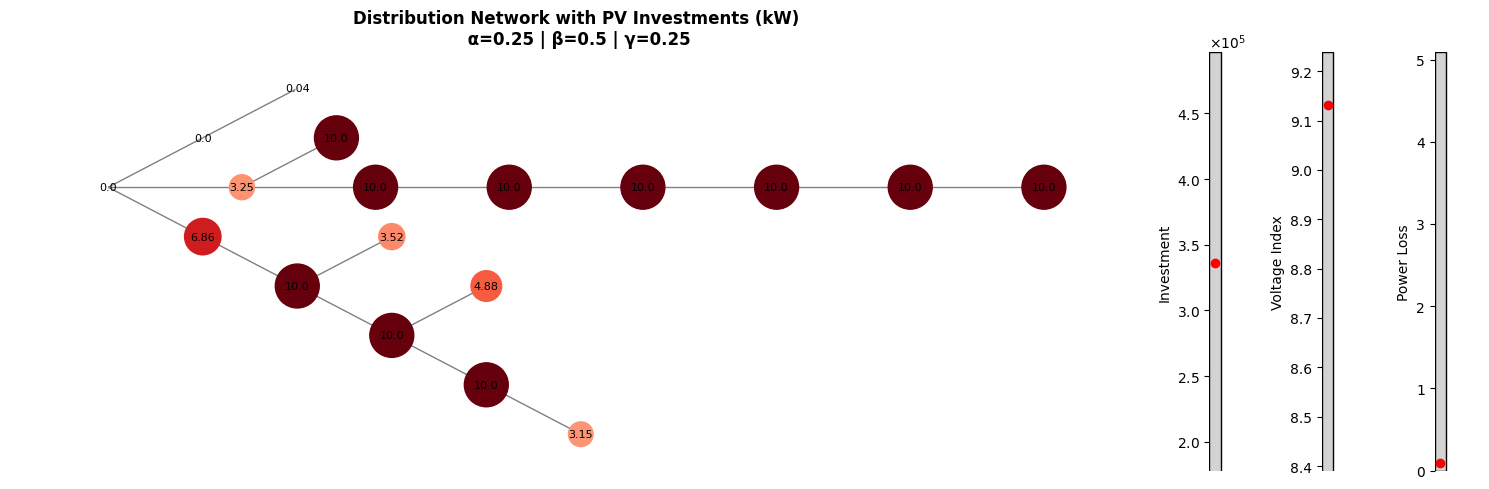

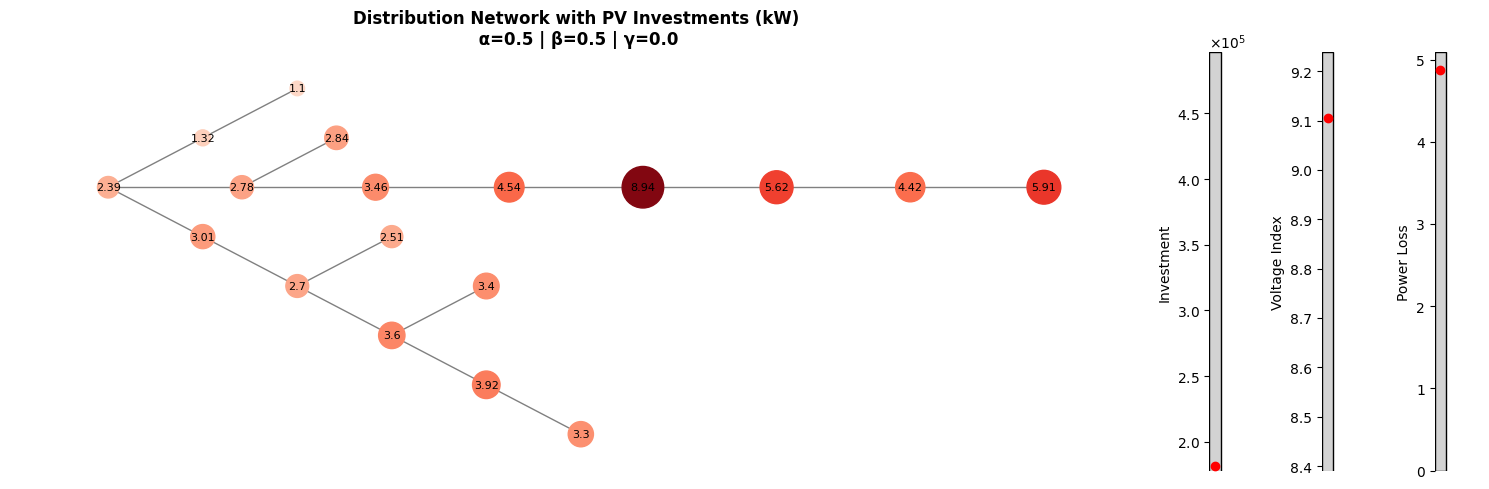

In [51]:
alpha0 = 0
beta_fix =0.5
step = 0.25
for i in range(3):
    gamma_val = 1-alpha0-step*i-beta_fix
    find_spec_plot(alpha0+step*i, beta_fix, gamma_val, hyper_param_vals)

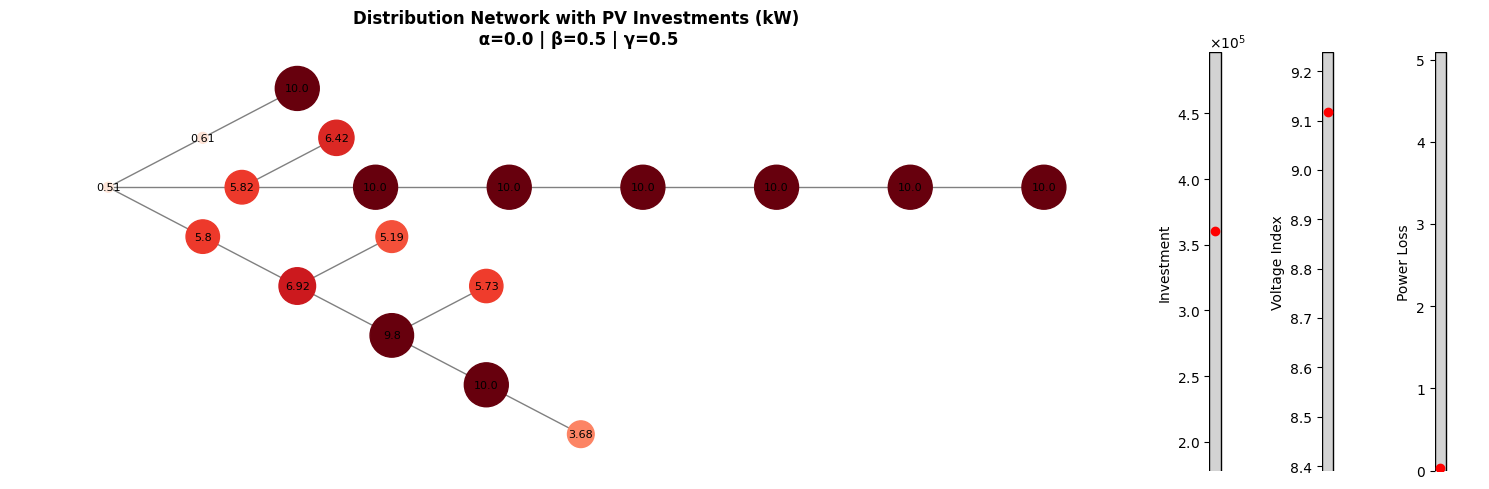

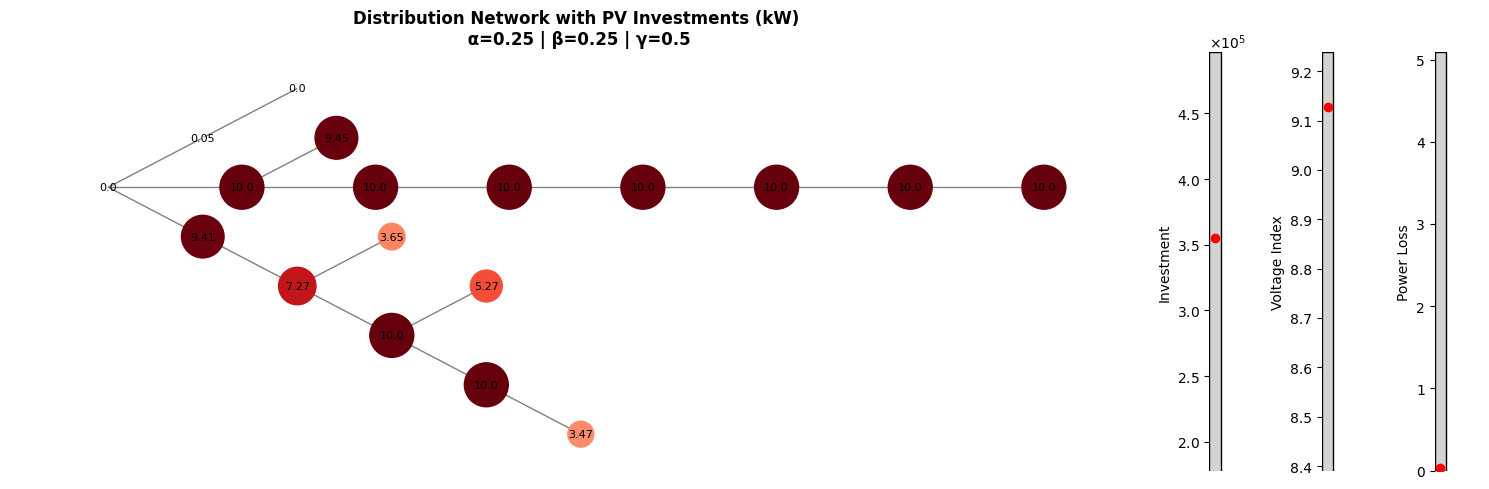

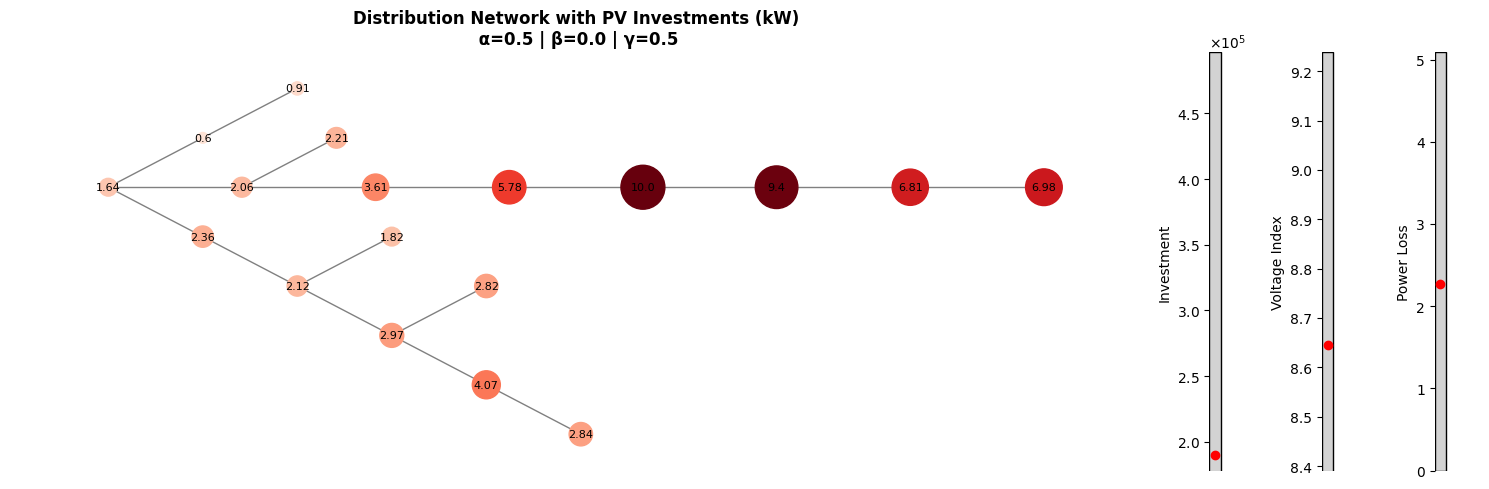

In [52]:
alpha0 = 0
gamma_fix =0.5
step = 0.25
for i in range(3):
    beta_val = 1-alpha0-step*i-gamma_fix
    find_spec_plot(alpha0+step*i, beta_val, gamma_fix, hyper_param_vals)

1.0


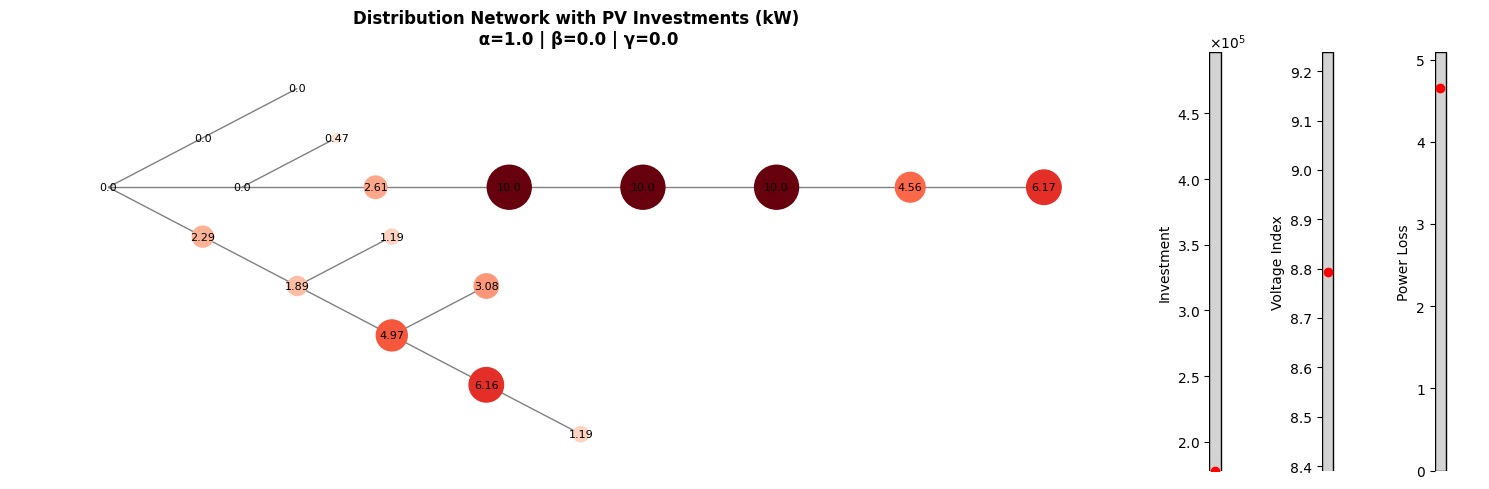

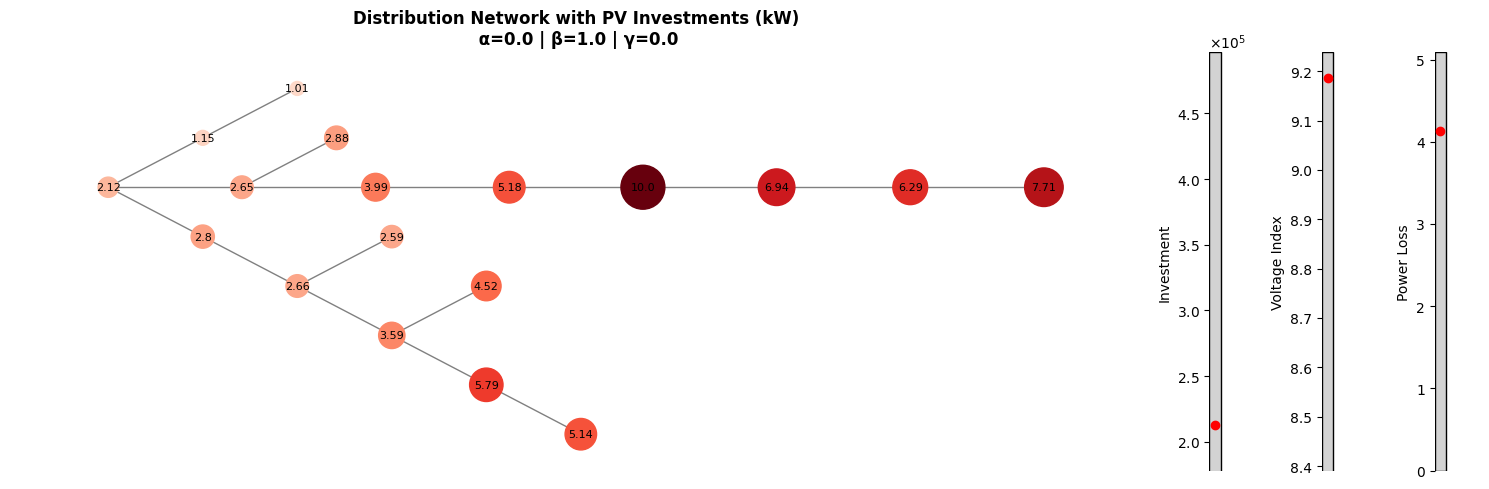

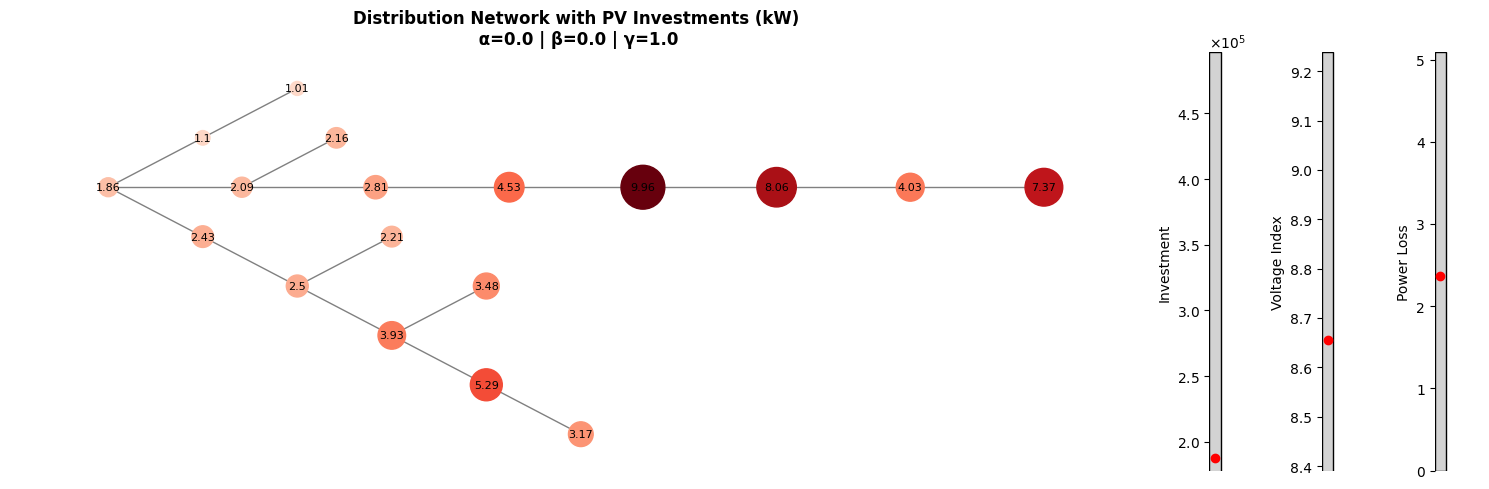

In [56]:
ones_mat = np.eye(3)
print(ones_mat[0][0])
for i in range(3):
    row = ones_mat[i]
    find_spec_plot(row[0], row[1], row[2], hyper_param_vals)
